# __Class Example__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import empiricaldist
from statadict import parse_stata_dict

In [2]:
dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

In [3]:
stata_dict = parse_stata_dict(dict_file)
import gzip

fp = gzip.open(data_file)


# Convert the file into Pandas DataFrame
# Fwf ->Fixed Width File  FP-> File Pointer
gss = pd.read_fwf(fp, names = stata_dict.names, colspecs = stata_dict.colspecs)
gss

,YEAR,ID_,AGE,EDUC,SEX,GUNLAW,GRASS,REALINC
0,1972,1,23,16,2,1,0,18951.0
1,1972,2,70,10,1,1,0,24366.0
2,1972,3,48,12,2,1,0,24366.0
3,1972,4,27,17,2,1,0,30458.0
4,1972,5,61,12,2,1,0,50763.0
...,...,...,...,...,...,...,...,...
64809,2018,2344,37,12,2,2,0,0.0
64810,2018,2345,75,12,2,2,0,14755.0
64811,2018,2346,67,12,2,1,1,45400.0
64812,2018,2347,72,16,1,0,2,24970.0


In [4]:
print(gss['EDUC'].value_counts().sort_index())

EDUC
0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: count, dtype: int64


In [5]:
import numpy as np
educ = gss['EDUC'].replace([98,99],np.nan)

In [6]:
import matplotlib.pyplot as plt

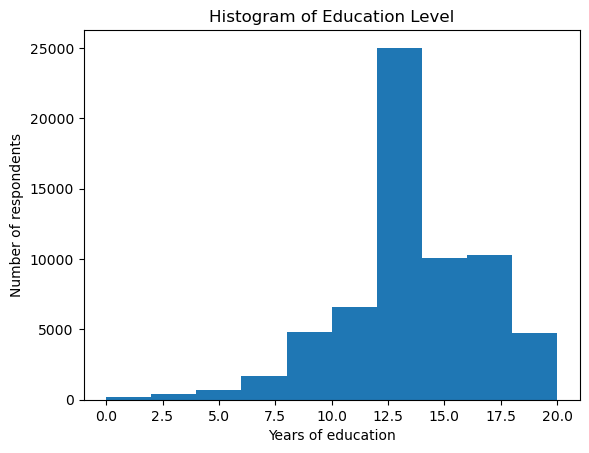

In [7]:
educ.hist(grid = False)
plt.xlabel('Years of education')
plt.ylabel('Number of respondents')
plt.title('Histogram of Education Level')
plt.show()

In [8]:
from empiricaldist import Pmf
pmf_educ = Pmf.from_seq(educ,normalize=False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])


<class 'empiricaldist.empiricaldist.Pmf'>
EDUC
0.0    165
1.0     47
2.0    152
Name: , dtype: int64
EDUC
18.0    2384
19.0     920
20.0    1439
Name: , dtype: int64
1439


In [9]:
pmf_educ_norm = Pmf.from_seq(educ,normalize=True)
print(pmf_educ_norm.head())
print(pmf_educ_norm[12]) 

EDUC
0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: , dtype: float64
0.30420656899299164


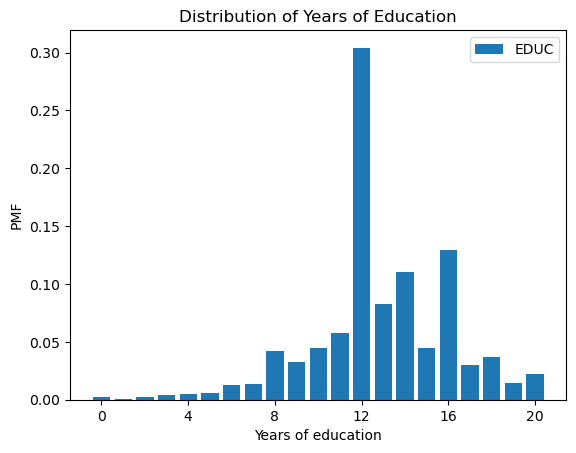

In [10]:
pmf_educ_norm.bar(label='EDUC')
plt.xlabel('Years of education')
plt.xticks(range(0,21,4))
plt.ylabel('PMF')
plt.title('Distribution of Years of Education')
plt.legend();
plt.show()

##### Example - Let's look at the year column in the dataframe which is represents the year each respondant was interviewed
##### Make a Un-Normalized PMF for year and display the result. How many respondants were interviewed in 2018

In [11]:
gss.head()

,YEAR,ID_,AGE,EDUC,SEX,GUNLAW,GRASS,REALINC
0,1972,1,23,16,2,1,0,18951.0
1,1972,2,70,10,1,1,0,24366.0
2,1972,3,48,12,2,1,0,24366.0
3,1972,4,27,17,2,1,0,30458.0
4,1972,5,61,12,2,1,0,50763.0


In [12]:
y = gss.YEAR
y

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
64809    2018
64810    2018
64811    2018
64812    2018
64813    2018
Name: YEAR, Length: 64814, dtype: int64

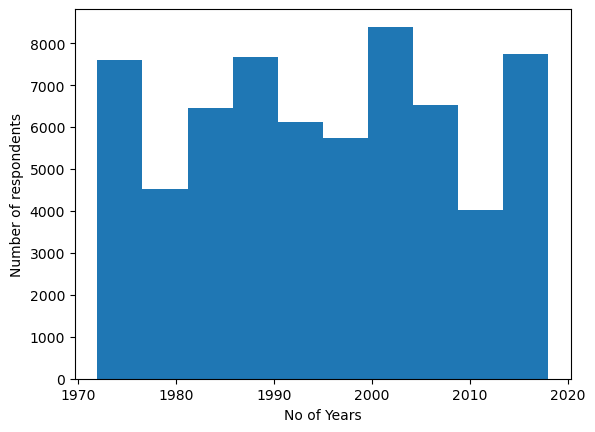

In [13]:
y.hist(grid = False)

plt.xlabel('No of Years')
plt.ylabel('Number of respondents')
#plt.title('Histogram of Mof of Years')
plt.show()

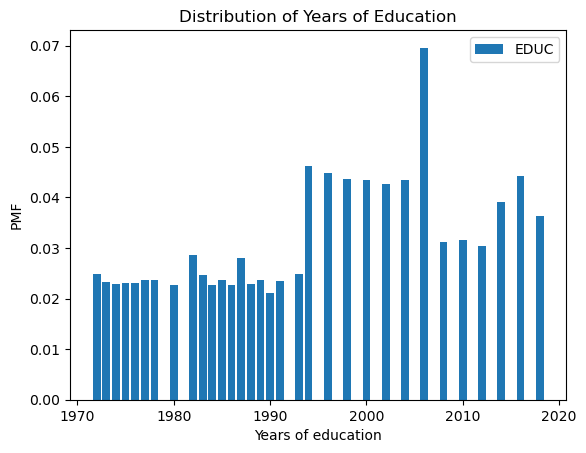

In [14]:
pmf_y_norm = Pmf.from_seq(y,normalize=True)
pmf_y_norm.bar(label='EDUC')
plt.xlabel('Years of education')
#plt.xticks(range(0,21,4))
plt.ylabel('PMF')
plt.title('Distribution of Years of Education')
plt.legend();
plt.show()

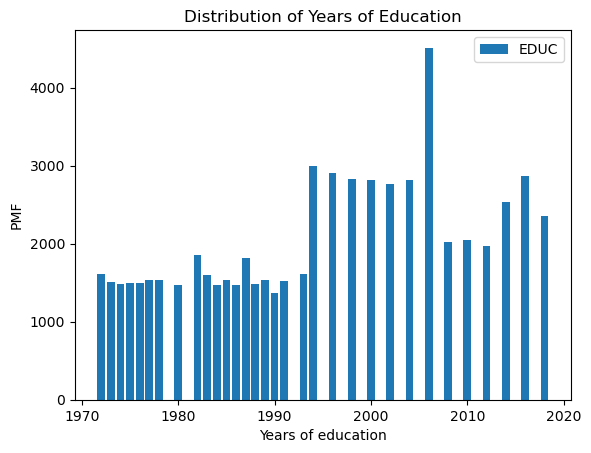

In [15]:
pmf_y = Pmf.from_seq(y,normalize=False)
pmf_y.bar(label='EDUC')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.title('Distribution of Years of Education')
plt.legend();
plt.show()

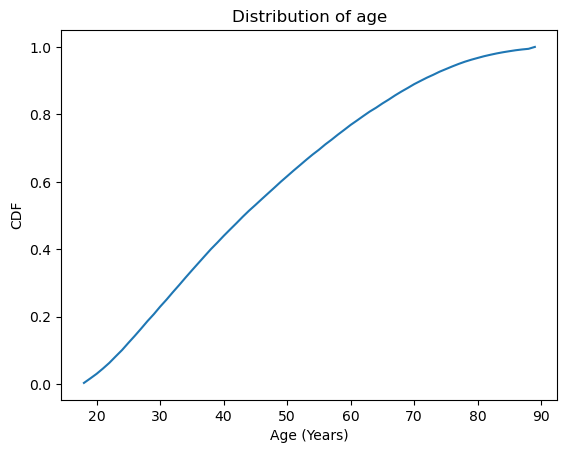

In [16]:
from empiricaldist import Cdf
age = gss['AGE'].replace([98,99],np.nan)

cdf_age = Cdf.from_seq(age)
cdf_age.plot()
plt.xlabel('Age (Years)')
plt.ylabel('CDF')
plt.title('Distribution of age');
plt.show()

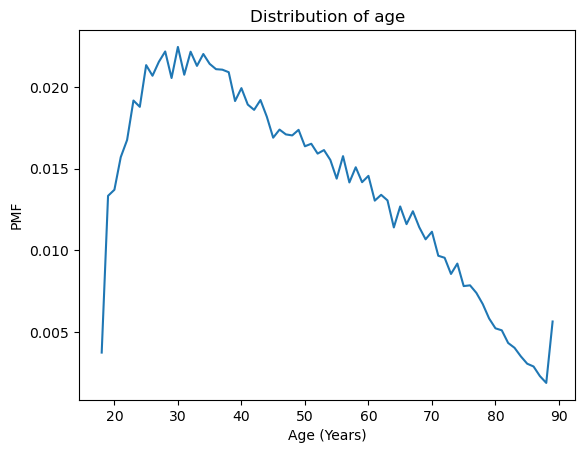

0        23.0
1        70.0
2        48.0
3        27.0
4        61.0
         ... 
64809    37.0
64810    75.0
64811    67.0
64812    72.0
64813    79.0
Name: AGE, Length: 64814, dtype: float64

In [17]:
from empiricaldist import Pmf
age = gss['AGE'].replace([98,99],np.nan)

pmf_age = Pmf.from_seq(age)
pmf_age.plot()
plt.xlabel('Age (Years)')
plt.ylabel('PMF')
plt.title('Distribution of age');
plt.show()
age

In [18]:
# we can also obtain culumative probability uptO certain point for ex - Age 51
q = 51
p = cdf_age(q)
print(p)

0.6331867587402843


In [19]:
# 25 % frist quritile of data
p1 =0.25
q1 = cdf_age.inverse(p1)

print(q1)

31.0


In [20]:
# 75% third Quirtile
p3 =0.75
q3 = cdf_age.inverse(p3)

print(q3)

59.0


In [21]:
# IQR inter quirtile Range
print(q3-q1)

28.0


##### EX 1:- using the cdf of age, compute the fraction of respondents in GSS dataset that are older than 65.add()
##### EX 2:- The distribution of income in almost all countires is long-tailed, which means there are a small number of people with vwry high income, in GSS dataset REALINC represents real household income, convertedin dollars. we can get a sense of this distribution by plotting  the CDF

In [22]:
# ex1:-
q = 65
p = cdf_age(q)
print(p)

0.8324249837426068


In [23]:
gss.head()

,YEAR,ID_,AGE,EDUC,SEX,GUNLAW,GRASS,REALINC
0,1972,1,23,16,2,1,0,18951.0
1,1972,2,70,10,1,1,0,24366.0
2,1972,3,48,12,2,1,0,24366.0
3,1972,4,27,17,2,1,0,30458.0
4,1972,5,61,12,2,1,0,50763.0


<Axes: xlabel='REALINC'>

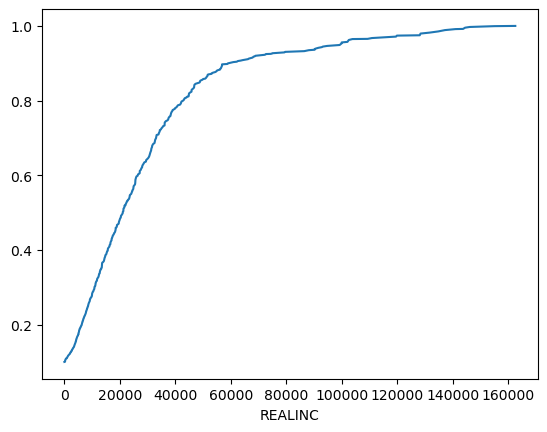

In [24]:
# EX2:-
from empiricaldist import Cdf
inc = gss['REALINC']

cdf_inc = Cdf.from_seq(inc)
cdf_inc.plot()
# plt.xlabel('Real Income')
# plt.ylabel('CDF')
# plt.title('Distribution of real income');
# plt.show()

In [25]:

# create series for male and female respondents
male = (gss['SEX']==1)
female = (gss['SEX']==2)

In [26]:
age = gss['AGE'].replace([99,98],np.nan)
age

0        23.0
1        70.0
2        48.0
3        27.0
4        61.0
         ... 
64809    37.0
64810    75.0
64811    67.0
64812    72.0
64813    79.0
Name: AGE, Length: 64814, dtype: float64

In [27]:
# Select Ages
male_a = age[male]
female_a = age[female]
male_a

1        70.0
5        26.0
6        28.0
7        27.0
11       56.0
         ... 
64796    50.0
64799    76.0
64806    89.0
64808    19.0
64812    72.0
Name: AGE, Length: 28614, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


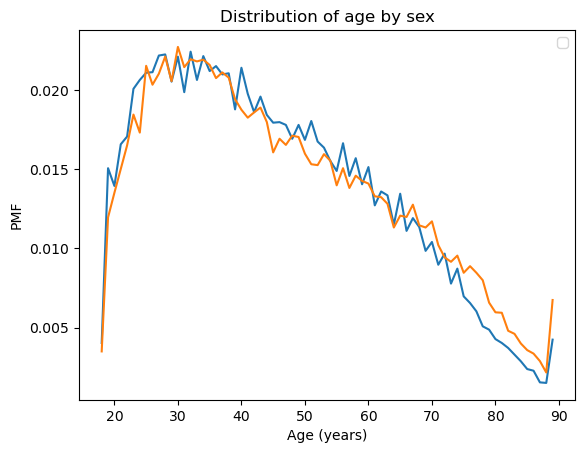

In [28]:
# plot PMF for Each
pmf_male_age = Pmf.from_seq(male_a)
pmf_male_age.plot()
pmf_female_age = Pmf.from_seq(female_a)
pmf_female_age.plot()
plt.xlabel('Age (years)')
plt.ylabel('PMF')

plt.title('Distribution of age by sex')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


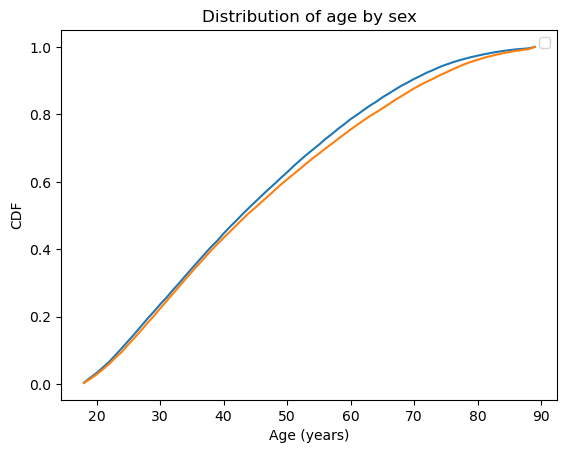

In [30]:
pmf_male_age = Cdf.from_seq(male_a)
pmf_male_age.plot()
pmf_female_age = Cdf.from_seq(female_a)
pmf_female_age.plot()
plt.xlabel('Age (years)')
plt.ylabel('CDF')

plt.title('Distribution of age by sex')
plt.legend()
plt.show()